In [3]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df_fgi = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fear_greed_index.csv")
df_hist = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/historical_data.csv")

print(df_hist.head())
print(df_fgi.head())


                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

In [9]:
import pytz

ist = pytz.timezone('Asia/Kolkata')

# Convert historical timestamps
df_hist["Timestamp"] = pd.to_datetime(df_hist["Timestamp IST"], dayfirst=True, errors='coerce')
df_hist["Timestamp"] = df_hist["Timestamp"].dt.tz_localize(ist).dt.tz_convert("UTC")
df_hist["date"] = pd.to_datetime(df_hist["Timestamp"].dt.date)

# Convert FGI dates
df_fgi["date"] = pd.to_datetime(df_fgi["date"], errors='coerce')


In [10]:
# Merge historical trades with FGI sentiment
df_merged = pd.merge(df_hist, df_fgi, on="date", how="left")

# Check merged data
print(df_merged.shape)
print(df_merged.head())


(211224, 20)
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         

In [11]:
trades_per_day = df_merged.groupby("date").size()
print(trades_per_day.head())


date
2023-04-30     3
2023-12-04     9
2023-12-13     3
2023-12-14    10
2023-12-16    11
dtype: int64


In [12]:
avg_pnl_sentiment = df_merged.groupby("classification")["Closed PnL"].mean()
print(avg_pnl_sentiment)


classification
Extreme Fear     50.337228
Extreme Greed    65.085144
Fear             46.626827
Greed            50.124579
Neutral          32.910163
Name: Closed PnL, dtype: float64


In [13]:
top_traders = df_merged.groupby("Account")["Closed PnL"].sum().sort_values(ascending=False).head()
print(top_traders)


Account
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    2.143383e+06
0x083384f897ee0f19899168e3b1bec365f52a9012    1.600230e+06
0xbaaaf6571ab7d571043ff1e313a9609a10637864    9.401638e+05
0x513b8629fe877bb581bf244e326a047b249c4ff1    8.404226e+05
0xbee1707d6b44d4d52bfe19e41f8a828645437aab    8.360806e+05
Name: Closed PnL, dtype: float64


FileNotFoundError: [Errno 2] No such file or directory: 'outputs/trades_per_day.png'

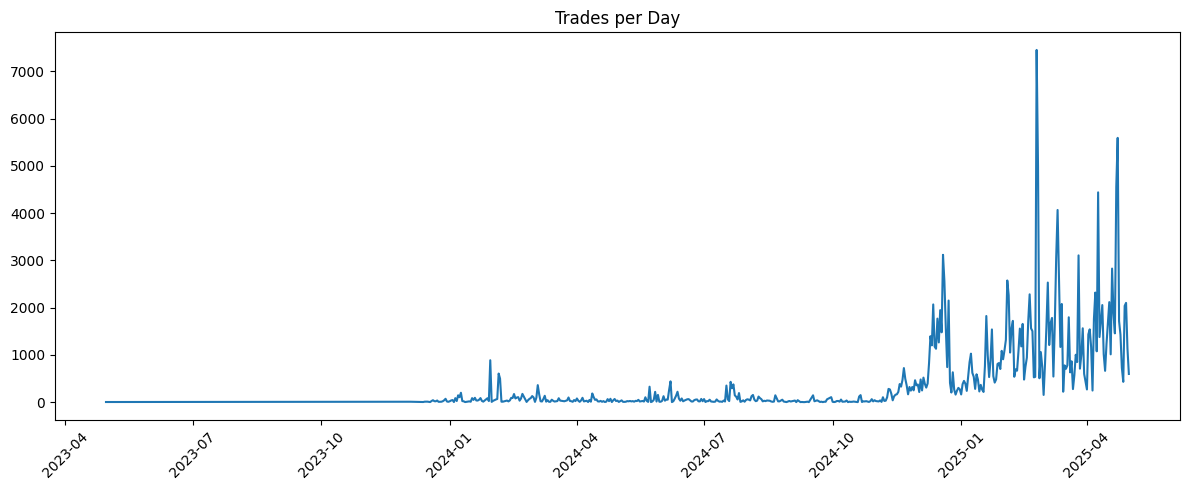

In [14]:
import matplotlib.pyplot as plt

# Trades per day chart
plt.figure(figsize=(12,5))
plt.plot(trades_per_day)
plt.title("Trades per Day")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outputs/trades_per_day.png")  # Save plot
plt.show()


In [15]:
# Save merged data
df_merged.to_csv("csv_files/merged_trades_with_sentiment.csv", index=False)


OSError: Cannot save file into a non-existent directory: 'csv_files'

In [23]:
from google.colab import files

# Download a CSV
files.download("csv_files/merged_trades_with_sentiment.csv")

# Download a plot
files.download("outputs/trades_per_day.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
import os

# Create folder if it doesn't exist
os.makedirs("csv_files", exist_ok=True)
os.makedirs("outputs", exist_ok=True)  # Also create outputs folder for plots


In [17]:
# Save merged data to csv_files folder
df_merged.to_csv("csv_files/merged_trades_with_sentiment.csv", index=False)

print("✅ Merged CSV saved successfully!")


✅ Merged CSV saved successfully!


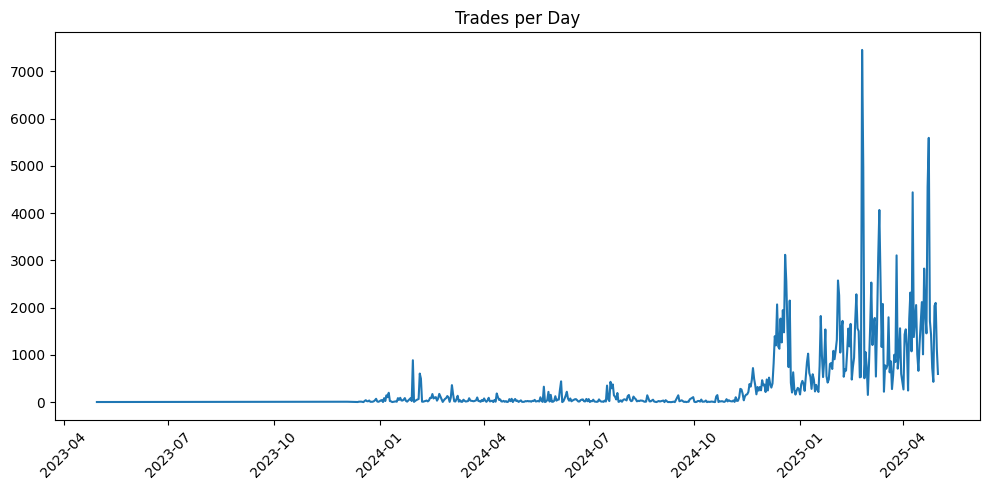

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df_merged.groupby("date").size())
plt.title("Trades per Day")
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig("outputs/trades_per_day.png")
plt.show()


✅ Folders created: csv_files, outputs
Historical Data Shape: (211224, 16)
FGI Data Shape: (2644, 4)
✅ Timestamps parsed successfully
Merged Data Shape: (211224, 20)


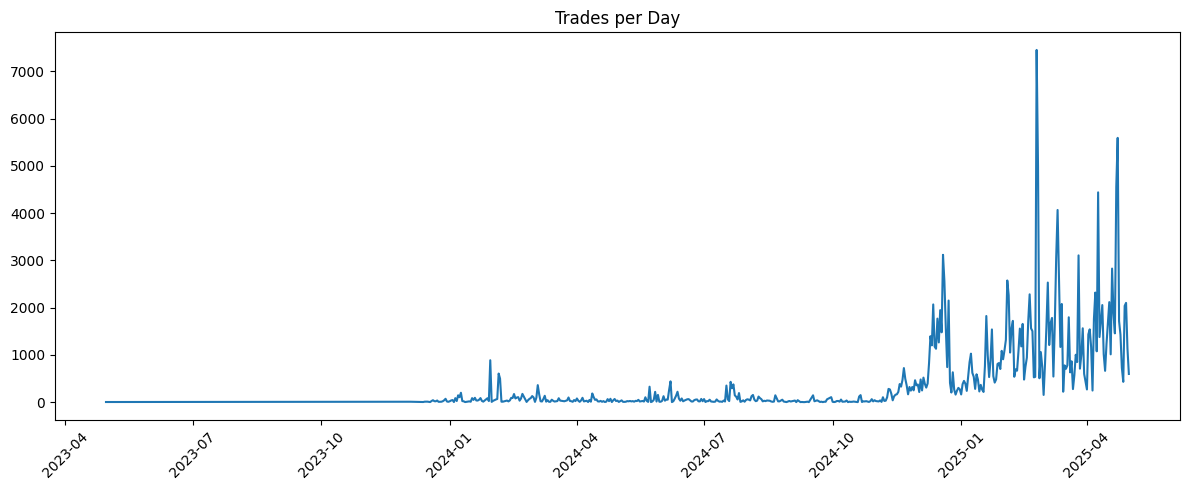


Average PnL by sentiment classification:
classification
Extreme Fear     50.337228
Extreme Greed    65.085144
Fear             46.626827
Greed            50.124579
Neutral          32.910163
Name: Closed PnL, dtype: float64

Top 5 Traders by Total PnL:
Account
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    2.143383e+06
0x083384f897ee0f19899168e3b1bec365f52a9012    1.600230e+06
0xbaaaf6571ab7d571043ff1e313a9609a10637864    9.401638e+05
0x513b8629fe877bb581bf244e326a047b249c4ff1    8.404226e+05
0xbee1707d6b44d4d52bfe19e41f8a828645437aab    8.360806e+05
Name: Closed PnL, dtype: float64
✅ Merged CSV saved in csv_files/merged_trades_with_sentiment.csv


In [22]:


import os
import pandas as pd
import matplotlib.pyplot as plt


os.makedirs("csv_files", exist_ok=True)
os.makedirs("outputs", exist_ok=True)

print("✅ Folders created: csv_files, outputs")



# Historical trades CSV
hist_file = "/content/drive/MyDrive/Colab Notebooks/historical_data.csv"

# Fear & Greed Index CSV
fgi_file = "/content/drive/MyDrive/Colab Notebooks/fear_greed_index.csv"

# Load CSVs
df_hist = pd.read_csv(hist_file)
df_fgi = pd.read_csv(fgi_file)

print("Historical Data Shape:", df_hist.shape)
print("FGI Data Shape:", df_fgi.shape)



import pytz

ist = pytz.timezone('Asia/Kolkata')

# Historical timestamps
if "Timestamp IST" in df_hist.columns:
    df_hist["Timestamp"] = pd.to_datetime(df_hist["Timestamp IST"], dayfirst=True, errors='coerce')
elif "Timestamp" in df_hist.columns:
    df_hist["Timestamp"] = pd.to_datetime(df_hist["Timestamp"], dayfirst=True, errors='coerce')

df_hist["Timestamp"] = df_hist["Timestamp"].dt.tz_localize(ist).dt.tz_convert("UTC")
df_hist["date"] = pd.to_datetime(df_hist["Timestamp"].dt.date)

# FGI dates
df_fgi["date"] = pd.to_datetime(df_fgi["date"], errors='coerce')

print("✅ Timestamps parsed successfully")



df_merged = pd.merge(df_hist, df_fgi, on="date", how="left")
print("Merged Data Shape:", df_merged.shape)
df_merged.head(3)



# Trades per day
trades_per_day = df_merged.groupby("date").size()

plt.figure(figsize=(12,5))
plt.plot(trades_per_day)
plt.title("Trades per Day")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outputs/trades_per_day.png")
plt.show()

# Avg PnL by sentiment
if 'Closed PnL' in df_merged.columns and 'classification' in df_merged.columns:
    avg_pnl_sentiment = df_merged.groupby("classification")["Closed PnL"].mean()
    print("\nAverage PnL by sentiment classification:")
    print(avg_pnl_sentiment)

# Top 5 accounts by total PnL
if 'Account' in df_merged.columns and 'Closed PnL' in df_merged.columns:
    top_traders = df_merged.groupby("Account")["Closed PnL"].sum().sort_values(ascending=False).head()
    print("\nTop 5 Traders by Total PnL:")
    print(top_traders)



df_merged.to_csv("csv_files/merged_trades_with_sentiment.csv", index=False)
print("✅ Merged CSV saved in csv_files/merged_trades_with_sentiment.csv")
